# Designing New NanoObject for Colored Lattice

In [ ]:
#7/16/2017

In [7]:
from ScatterSim.NanoObjects import SphereNanoObject,CylinderNanoObject, PolydisperseNanoObject
# We'll import a few lattices, cubic, FCC, BCC and Diamond
from ScatterSim.LatticeObjects import Lattice, SimpleCubic, FCCLattice, BCCLattice, DiamondTwoParticleLattice
from ScatterSim.CustomLattices import BCCLatticeColor
# import the peak shape for the peaks, tunable
from ScatterSim.PeakShape import PeakShape
from ScatterSim.CompositeNanoObjects import CompositeNanoObject, OctahedronNanoObject, OctahedronCylindersNanoObject
from ScatterSim.Background import Background

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
def show_projections(V_xy, V_xz, V_yz, height, num=4):
    '''plot the xy, xz, and yz projections with height used from 
        projections function, in figure num
    '''
    extent = [-height, height, height, -height]
    plt.figure(num);plt.clf();
    plt.subplot(2,2,1)
    plt.title("x-y plane")
    plt.imshow(V_xy,extent=extent)
    plt.subplot(2,2,2)
    plt.title("y-z plane")
    plt.imshow(V_yz,extent=extent)
    plt.subplot(2,2,3)
    plt.title("x-z plane")
    plt.imshow(V_xz,extent=extent)

In [9]:
pargs_sphere_10 = {'radius':10, 'x0':0}
pargs_sphere_20 = {'radius':20,'x0':0}
pargs_sphere_30 = {'radius':30}

ten = SphereNanoObject(pargs_sphere_10)
twenty = SphereNanoObject(pargs_sphere_20)
thirty = SphereNanoObject(pargs_sphere_30)


sphereobjs = [SphereNanoObject]
# the pargs for each object
sphereparams = [pargs_sphere_10]

ten_twenty = CompositeNanoObject(sphereobjs,sphereparams)

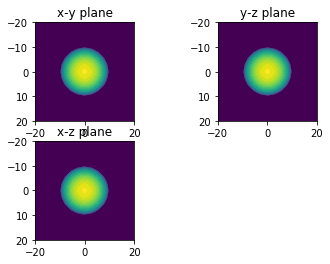

In [10]:
# Shape of your Composite Object
rmax = 20
Vi_xy, Vi_yz, Vi_xz = ten_twenty.projections(rmax)
show_projections(Vi_xy, Vi_yz, Vi_xz ,rmax)

In [11]:
#Lattice based on composite object in a SC,BCC,FCC lattice

q = np.linspace(.4, 1, 1000)
lattice_spacing = 60 #nm
sigma_D = .06 # add a Debye-Waller factor
peak = PeakShape(delta=0.01, nu=0.01)  
lat_bcc = BCCLattice([ten_twenty], lattice_spacing_a=lattice_spacing, sigma_D=sigma_D)
lat_fcc = FCCLattice([ten_twenty], lattice_spacing_a=lattice_spacing, sigma_D=sigma_D)
lat_sc = SimpleCubic([ten_twenty], lattice_spacing_a=lattice_spacing, sigma_D=sigma_D)

%time Z0_bcc = lat_bcc.intensity(q, peak)
%time Z0_fcc =lat_fcc.intensity(q, peak)
%time Z0_sc = lat_sc.intensity(q, peak)
print('done, phew')

Wall time: 1.16 s
Wall time: 1.39 s
Wall time: 1.04 s
done, phew


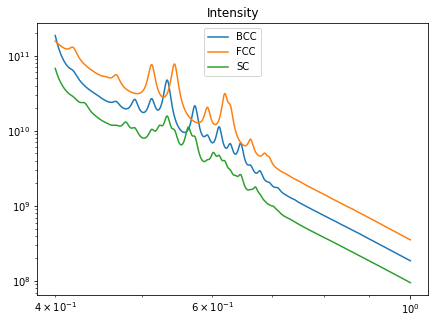

In [12]:
#BCC, FCC and SC
plt.figure(0, figsize=(7,5));
plt.clf()
ROI = [1e9,1e12,0,10]
plt.title("Intensity")
plt.loglog(q, Z0_bcc,label="BCC")
plt.loglog(q,Z0_fcc, label="FCC")
plt.loglog(q,Z0_sc, label="SC")
plt.legend(loc='upper center')


In [13]:
#Visualize unit cell
length=100
extent = [-length, length, length, length]
[x_bcc,y_bcc,z_bcc]=lat_bcc.projections(length)
[x_fcc,y_fcc,z_fcc]=lat_fcc.projections(length)
print("Finished Visualization work, lets go plot them")

Finished Visualization work, lets go plot them


In [14]:
#np.shape(x_bcc)

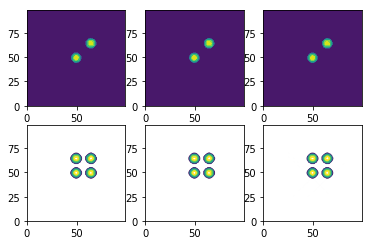

In [15]:
plt.figure('Lattice Visual',figsize=(6,6))
plt.subplot(331)
plt.contourf(x_bcc)
plt.subplot(332)
plt.contourf(y_bcc)
plt.subplot(333)
plt.contourf(z_bcc)
plt.subplot(334)
plt.contour(x_fcc)
plt.subplot(335)
plt.contour(y_fcc)
plt.subplot(336)
plt.contour(z_fcc)

In [16]:
base = CylinderNanoObject
linker = SphereNanoObject
#linker = base
pargs_oct = {'edgelength':10, 'radius':1,'height':10,'linkerlength':1, 'linkerradius':1}

octahedron = OctahedronCylindersNanoObject(base, linker,pargs_oct)

In [25]:
""" MAY NOT WORK ON ALL SYSTEMS
from ipywidgets import widgets 
%matplotlib inline 
length = 10
npoints = 100
x = np.linspace(-length, length, npoints)
# ij indexing means that we index in V[x,y,z]
# Note that rightermost index is fastest varying index
x, y, z = np.meshgrid(x,x,x,indexing='ij')
V = octahedron.V(np.array([x,y,z]))


def f(x):
    i = x
    plt.figure('oct real space');
    plt.clf()
    plt.imshow(V[:,:,50])
    
widgets.interact(f,x=50)
"""


" MAY NOT WORK ON ALL SYSTEMS\nfrom ipywidgets import widgets \n%matplotlib inline \nlength = 10\nnpoints = 100\nx = np.linspace(-length, length, npoints)\n# ij indexing means that we index in V[x,y,z]\n# Note that rightermost index is fastest varying index\nx, y, z = np.meshgrid(x,x,x,indexing='ij')\nV = octahedron.V(np.array([x,y,z]))\n\n\ndef f(x):\n    i = x\n    plt.figure('oct real space');\n    plt.clf()\n    plt.imshow(V[:,:,50])\n    \nwidgets.interact(f,x=50)\n"

# BCC Color Lattice

In [33]:
pargs_sphere_10 = {'radius':10, 'x0':0}
pargs_sphere_20 = {'radius':20,'x0':0}

ten = SphereNanoObject(pargs_sphere_10)
twenty = SphereNanoObject(pargs_sphere_20)
thirty = SphereNanoObject(pargs_sphere_30)


sphereobjs =[twenty,ten]
# the pargs for each object


sphereobjs

In [34]:
peak = PeakShape()
peak.lorentzian(delta=0.01)

In [35]:
q = np.linspace(.4, 1, 1000)
lattice_spacing = 60 #nm
sigma_D = .06 # add a Debye-Waller factor



lat_bcc_color = BCCLatticeColor(sphereobjs, lattice_spacing_a=lattice_spacing, sigma_D=sigma_D)
%time Z0_bcc_color = lat_bcc_color.intensity(q, peak)

Wall time: 215 ms


In [29]:
#%debug

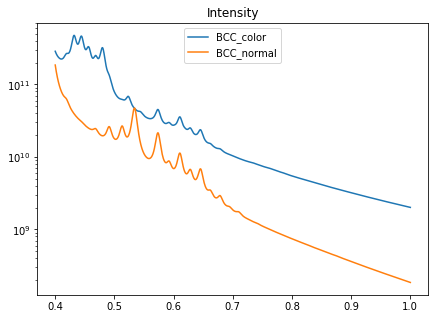

In [36]:
plt.figure(2, figsize=(7,5));
plt.clf()
ROI = [1e9,1e12,0,10]
plt.title("Intensity")
plt.semilogy(q, Z0_bcc_color,label="BCC_color")
plt.semilogy(q,Z0_bcc, label="BCC_normal")
plt.legend(loc='upper center')


In [37]:
length=100
extent = [-length, length, length, length]
[x_bcc_c,y_bcc_c,z_bcc_c]=lat_bcc_color.projections(length)
[x_bcc,y_bcc,z_bcc]=lat_bcc.projections(length)
print("Finished Visualization work, lets go plot them")

Finished Visualization work, lets go plot them


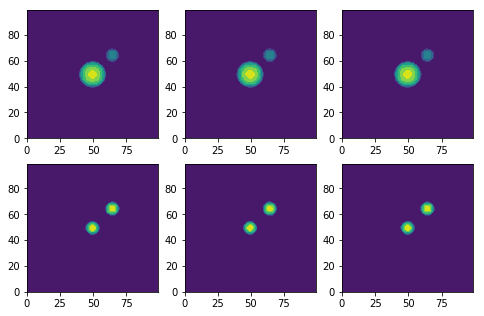

In [38]:
plt.figure('Lattice Visual Color',figsize=(8,8))
plt.subplot(331)
plt.contourf(x_bcc_c)
plt.subplot(332)
plt.contourf(y_bcc_c)
plt.subplot(333)
plt.contourf(z_bcc_c)
plt.subplot(334)
plt.contourf(x_bcc)
plt.subplot(335)
plt.contourf(y_bcc)
plt.subplot(336)
plt.contourf(z_bcc)